<a href="https://www.kaggle.com/code/jmas19/mining-process-project?scriptVersionId=162226133" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mining Process Project
#### Author: Jonathan Mastin
#### Date: 02/06/2024

## Senario:

In this project, I have been recently hired as a data analyst for a manufacturing / engineering / science company. More specifically, I've been hired as a data analyst for a mining company called Metals R' Us and I've been given data from their flotation plant.

**This data is real data taken from March 2017 to September 2017. The data is a bit messy in some ways with some columns sampled every 20 seconds, and other sampled every hour.** 

Every row is a time point at 20 second intervals. The date column has the day, month, year, and hour, but doesn't show minutes. There are 24 columns.

The boss says something weird happened on June 1, 2017 and has asked me to investigate.

In [1]:
#Load the libraries required
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
# Read in the csv file
mining_process_df = pd.read_csv('/kaggle/input/quality-prediction-in-a-mining-process/MiningProcess_Flotation_Plant_Database.csv',decimal=",")

#### Exploritory Data Analysis (EDA)

In [3]:
# Looking at the first 5 rows of the .csv file
mining_process_df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
mining_process_df.shape

(737453, 24)

In [5]:
mining_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

With the `.info()` method we see that the date column in a Dtype `object` when it should be a Dtype `datetime`.

In [6]:
mining_process_df['date'] = pd.to_datetime(mining_process_df['date'])

In [7]:
# Confirm the column has been changed
mining_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

#### Descriptive Analysis

In [8]:
mining_process_df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,2017-06-16 03:27:22.656549376,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
min,2017-03-10 01:00:00,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,2017-05-04 23:00:00,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,2017-06-16 15:00:00,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,2017-07-29 07:00:00,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,2017-09-09 23:00:00,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000
std,NaN,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554


The `.describe()` method only works on numberical columns. It is a quick way to find the `average`, `median`, `min`, `max`, and more for every numerical column.

#### Focus on the important data

The `% Iron Concentrate` is the most important column. But our engineer peer tells us that the `% Silica Concentrate`, `Ore Pupl pH`, & `Flotation Column 05 Level` are all really important as well. As well as the `date`.

Something weird happened on June 1, 2017, so that needs to be investigated. 

In [9]:
max_date = mining_process_df['date'].max()
print(f'The max date is {max_date}')

min_date = mining_process_df['date'].min()
print(f'The min date is {min_date}')

The max date is 2017-09-09 23:00:00
The min date is 2017-03-10 01:00:00


In [10]:
important_cols = [
    'date',
    '% Iron Concentrate',
    '% Silica Concentrate',
    'Ore Pulp pH',
    'Flotation Column 05 Level'
]
mining_important_df = mining_process_df[important_cols]
mining_important_df

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
0,2017-03-10 01:00:00,66.91,1.31,10.06640,502.255
1,2017-03-10 01:00:00,66.91,1.31,10.06720,496.363
2,2017-03-10 01:00:00,66.91,1.31,10.06800,484.411
3,2017-03-10 01:00:00,66.91,1.31,10.06890,471.411
4,2017-03-10 01:00:00,66.91,1.31,10.06970,462.598
...,...,...,...,...,...
737448,2017-09-09 23:00:00,64.27,1.71,9.62129,497.548
737449,2017-09-09 23:00:00,64.27,1.71,9.62063,506.398
737450,2017-09-09 23:00:00,64.27,1.71,9.61874,503.414
737451,2017-09-09 23:00:00,64.27,1.71,9.61686,502.301


In [11]:
mining_important_df.describe()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
count,737453,737453.000000,737453.000000,737453.000000,737453.000000
mean,2017-06-16 03:27:22.656549376,65.050068,2.326763,9.767639,425.251706
min,2017-03-10 01:00:00,62.050000,0.600000,8.753340,166.991000
25%,2017-05-04 23:00:00,64.370000,1.440000,9.527360,357.653000
50%,2017-06-16 15:00:00,65.210000,2.000000,9.798100,408.773000
75%,2017-07-29 07:00:00,65.860000,3.010000,10.038000,484.329000
max,2017-09-09 23:00:00,68.010000,5.530000,10.808100,675.644000
std,NaN,1.118645,1.125554,0.387007,84.535822


<Axes: >

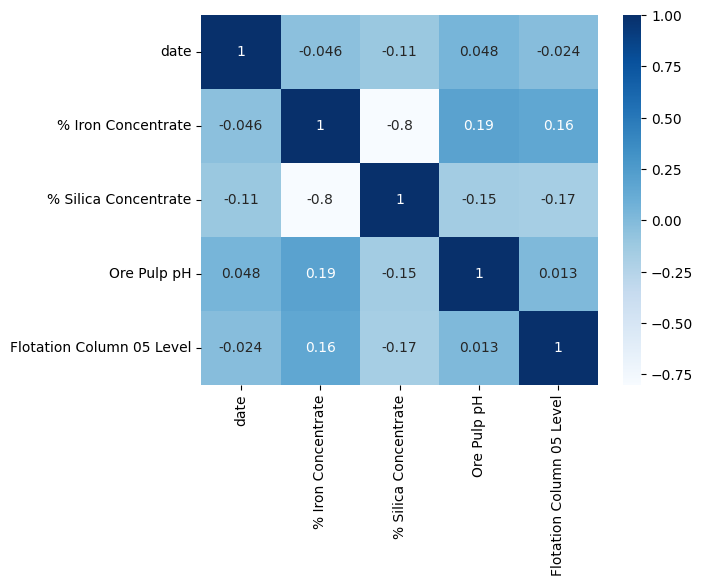

In [12]:
corr_mining_df = mining_important_df.corr()
sns.heatmap(corr_mining_df, cmap="Blues", annot=True)

In [13]:
june_df = mining_process_df[(mining_process_df['date'] > "2017-05-31 23:59:59") & (mining_process_df['date'] < "2017-07-01")].reset_index(drop=True)
june_df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-06-01 00:00:00,64.03,6.26,2964.08,457.908,394.968,9.55029,1.63544,300.522,303.714,...,298.360,610.041,601.107,590.212,571.422,522.585,497.025,511.078,64.46,1.73
1,2017-06-01 00:00:00,64.03,6.26,2972.19,458.139,393.641,9.55201,1.63574,300.771,300.644,...,297.613,604.373,604.956,591.842,567.588,497.841,509.922,538.574,64.46,1.73
2,2017-06-01 00:00:00,64.03,6.26,2980.30,458.369,392.313,9.55373,1.63604,301.020,297.575,...,296.866,598.705,608.805,593.471,563.754,473.097,522.820,566.070,64.46,1.73
3,2017-06-01 00:00:00,64.03,6.26,3036.45,457.847,402.497,9.55544,1.63634,301.015,296.245,...,303.630,589.618,604.796,593.901,550.891,455.752,525.917,585.765,64.46,1.73
4,2017-06-01 00:00:00,64.03,6.26,3068.72,459.983,396.253,9.55716,1.63664,301.085,304.795,...,299.320,583.780,609.901,603.054,560.003,475.140,507.331,572.310,64.46,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2017-06-30 23:00:00,49.36,25.87,5860.96,570.888,399.673,10.70590,1.69826,299.182,293.502,...,301.342,496.924,478.888,494.201,471.674,470.420,483.382,453.305,65.83,1.27
129596,2017-06-30 23:00:00,49.36,25.87,5540.02,572.563,399.991,10.70370,1.69867,298.828,301.112,...,299.755,496.484,504.890,510.404,483.976,485.478,500.632,440.410,65.83,1.27
129597,2017-06-30 23:00:00,49.36,25.87,5417.05,566.946,396.445,10.70160,1.69908,298.828,301.487,...,300.599,487.203,518.271,523.119,508.329,494.492,521.817,449.810,65.83,1.27
129598,2017-06-30 23:00:00,49.36,25.87,5336.23,572.965,400.225,10.69950,1.69949,299.197,288.894,...,301.543,501.010,533.742,529.962,532.491,502.635,526.745,472.258,65.83,1.27


In [14]:
important_cols = [
    'date',
    '% Iron Concentrate',
    '% Silica Concentrate',
    'Ore Pulp pH',
    'Flotation Column 05 Level'
]
june_important_df = june_df[important_cols]
june_important_df

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
0,2017-06-01 00:00:00,64.46,1.73,9.55029,522.585
1,2017-06-01 00:00:00,64.46,1.73,9.55201,497.841
2,2017-06-01 00:00:00,64.46,1.73,9.55373,473.097
3,2017-06-01 00:00:00,64.46,1.73,9.55544,455.752
4,2017-06-01 00:00:00,64.46,1.73,9.55716,475.140
...,...,...,...,...,...
129595,2017-06-30 23:00:00,65.83,1.27,10.70590,470.420
129596,2017-06-30 23:00:00,65.83,1.27,10.70370,485.478
129597,2017-06-30 23:00:00,65.83,1.27,10.70160,494.492
129598,2017-06-30 23:00:00,65.83,1.27,10.69950,502.635


In [15]:
june_important_df.describe()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
count,129600,129600.000000,129600.000000,129600.000000,129600.000000
mean,2017-06-15 23:30:00,65.293028,2.048125,9.788932,447.113067
min,2017-06-01 00:00:00,62.160000,0.860000,8.754140,167.359000
25%,2017-06-08 11:45:00,64.730000,1.450000,9.589910,398.891500
50%,2017-06-15 23:30:00,65.330000,1.820000,9.815380,443.877500
75%,2017-06-23 11:15:00,65.990000,2.400000,10.007800,496.783500
max,2017-06-30 23:00:00,67.630000,5.470000,10.711900,675.422000
std,NaN,0.970455,0.870493,0.316383,68.157726


<Axes: >

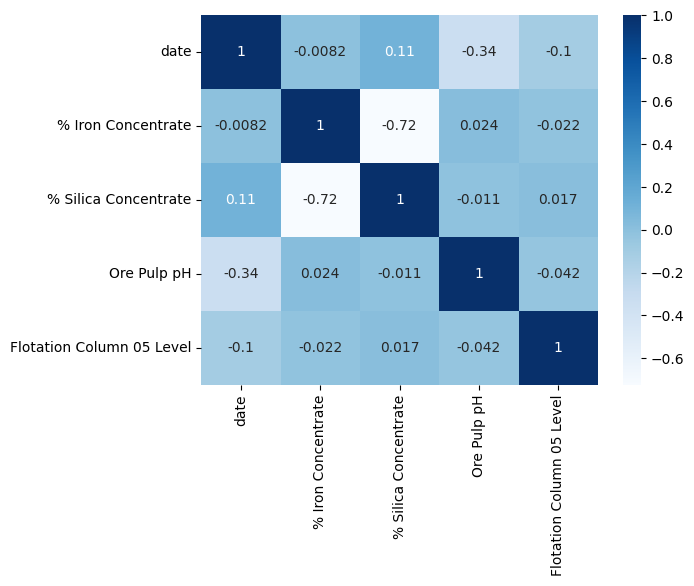

In [16]:
corr_june_df = june_important_df.corr()
sns.heatmap(corr_june_df, cmap="Blues", annot=True)

In [17]:
june_1_df = mining_process_df[(mining_process_df['date'] > "2017-05-31 23:59:59") & (mining_process_df['date'] < "2017-06-02")].reset_index(drop=True)
june_1_df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-06-01 00:00:00,64.03,6.26,2964.08,457.908,394.968,9.55029,1.63544,300.522,303.714,...,298.360,610.041,601.107,590.212,571.422,522.585,497.025,511.078,64.46,1.73
1,2017-06-01 00:00:00,64.03,6.26,2972.19,458.139,393.641,9.55201,1.63574,300.771,300.644,...,297.613,604.373,604.956,591.842,567.588,497.841,509.922,538.574,64.46,1.73
2,2017-06-01 00:00:00,64.03,6.26,2980.30,458.369,392.313,9.55373,1.63604,301.020,297.575,...,296.866,598.705,608.805,593.471,563.754,473.097,522.820,566.070,64.46,1.73
3,2017-06-01 00:00:00,64.03,6.26,3036.45,457.847,402.497,9.55544,1.63634,301.015,296.245,...,303.630,589.618,604.796,593.901,550.891,455.752,525.917,585.765,64.46,1.73
4,2017-06-01 00:00:00,64.03,6.26,3068.72,459.983,396.253,9.55716,1.63664,301.085,304.795,...,299.320,583.780,609.901,603.054,560.003,475.140,507.331,572.310,64.46,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2017-06-01 23:00:00,64.03,6.26,4083.96,492.849,399.827,9.90185,1.72456,300.635,249.249,...,298.850,598.277,592.425,590.496,517.122,519.440,502.162,495.656,63.00,1.81
4316,2017-06-01 23:00:00,64.03,6.26,4092.86,490.285,403.184,9.89964,1.72524,300.548,250.843,...,300.371,588.641,590.660,590.683,517.989,524.484,492.019,502.113,63.00,1.81
4317,2017-06-01 23:00:00,64.03,6.26,4099.42,490.115,405.381,9.89743,1.72585,300.236,250.881,...,300.716,582.218,594.280,596.211,514.136,524.173,490.333,512.261,63.00,1.81
4318,2017-06-01 23:00:00,64.03,6.26,4103.37,494.347,405.177,9.89521,1.72647,299.926,247.189,...,297.969,582.690,603.818,607.482,506.795,515.848,492.396,527.032,63.00,1.81


In [18]:
important_cols = [
    'date',
    '% Iron Concentrate',
    '% Silica Concentrate',
    'Ore Pulp pH',
    'Flotation Column 05 Level'
]
june_1_important_df = june_1_df[important_cols]
june_1_important_df

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
0,2017-06-01 00:00:00,64.46,1.73,9.55029,522.585
1,2017-06-01 00:00:00,64.46,1.73,9.55201,497.841
2,2017-06-01 00:00:00,64.46,1.73,9.55373,473.097
3,2017-06-01 00:00:00,64.46,1.73,9.55544,455.752
4,2017-06-01 00:00:00,64.46,1.73,9.55716,475.140
...,...,...,...,...,...
4315,2017-06-01 23:00:00,63.00,1.81,9.90185,519.440
4316,2017-06-01 23:00:00,63.00,1.81,9.89964,524.484
4317,2017-06-01 23:00:00,63.00,1.81,9.89743,524.173
4318,2017-06-01 23:00:00,63.00,1.81,9.89521,515.848


In [19]:
june_1_important_df.describe()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
count,4320,4320.000000,4320.000000,4320.000000,4320.000000
mean,2017-06-01 11:29:59.999999744,64.985417,1.839583,9.918250,492.239592
min,2017-06-01 00:00:00,63.000000,1.080000,9.502640,180.866000
25%,2017-06-01 05:45:00,64.615000,1.217500,9.804667,479.713250
50%,2017-06-01 11:30:00,64.970000,1.670000,9.945410,500.357000
75%,2017-06-01 17:15:00,65.537500,2.120000,10.040650,519.168750
max,2017-06-01 23:00:00,66.390000,4.060000,10.301200,671.909000
std,NaN,0.801409,0.762237,0.180342,65.616890


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

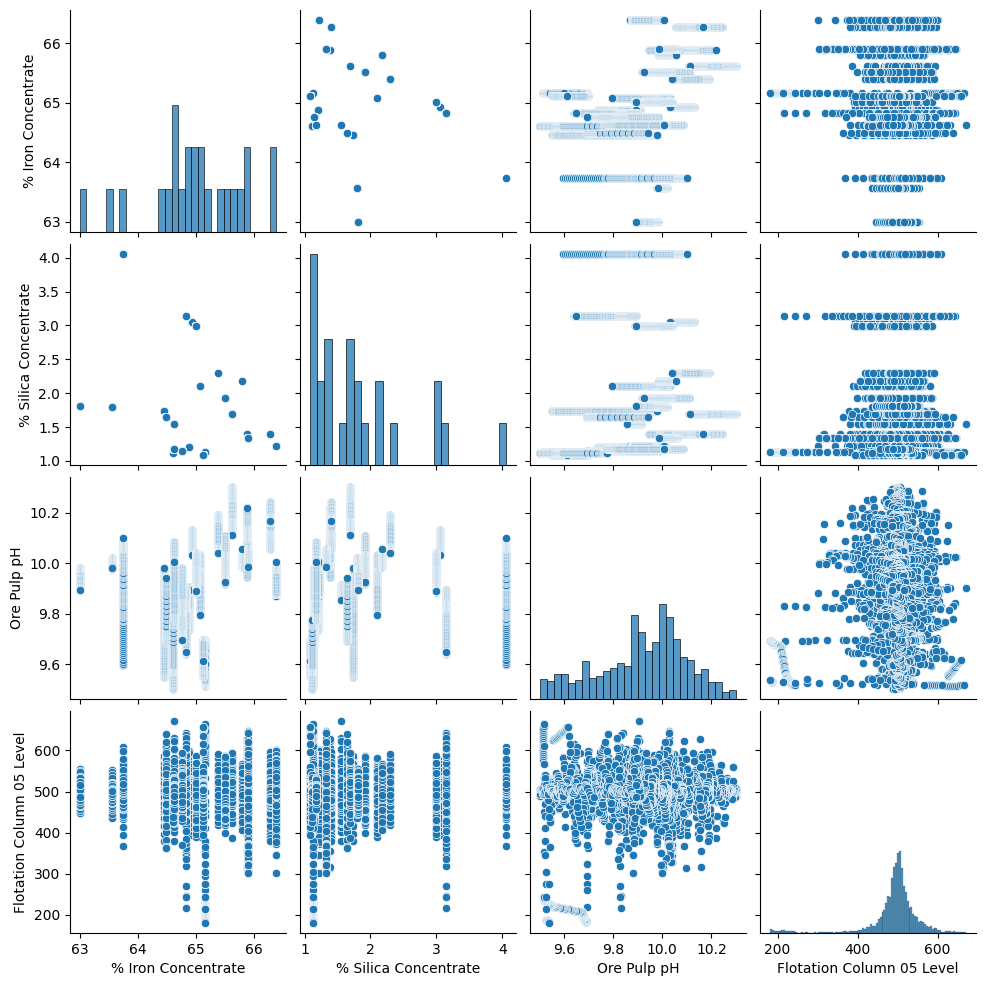

In [20]:
sns.pairplot(june_1_important_df)

In [21]:
june_1_important_df.corr()

,date,% Iron Concentrate,% Silica Concentrate,Ore Pulp pH,Flotation Column 05 Level
date,1.000000,-0.286235,-0.177266,-0.226808,-0.119245
% Iron Concentrate,-0.286235,1.000000,-0.271731,0.302994,-0.045116
% Silica Concentrate,-0.177266,-0.271731,1.000000,0.191370,0.118911
Ore Pulp pH,-0.226808,0.302994,0.191370,1.000000,0.201715
Flotation Column 05 Level,-0.119245,-0.045116,0.118911,0.201715,1.000000


<Axes: >

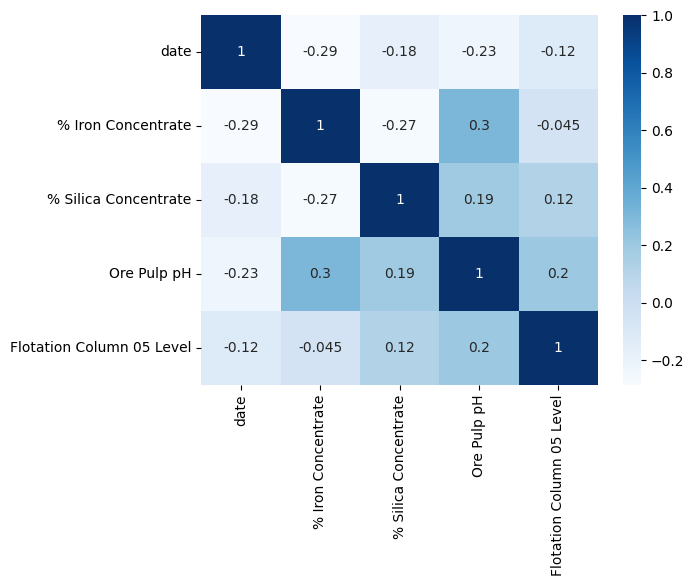

In [22]:
corr_june_1_df = june_1_important_df.corr()
sns.heatmap(corr_june_1_df, cmap="Blues", annot=True)

A correlation matrix number of **.7** or greater means there is a significant correlation.

No real relationship can be seen between the columns. This can be confirmed with a correlation matrix.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='% Iron Concentrate'>

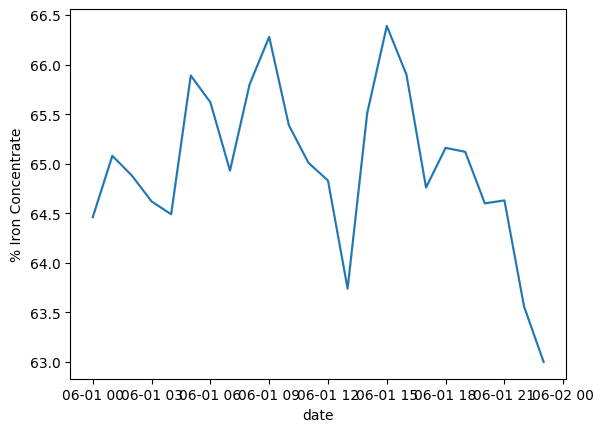

In [23]:
sns.lineplot(x='date', y='% Iron Concentrate', data=june_1_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


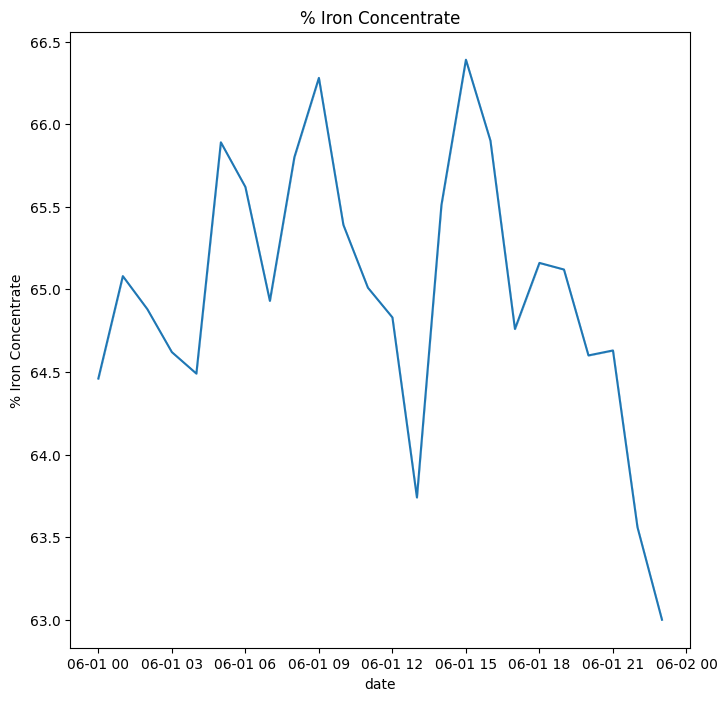

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


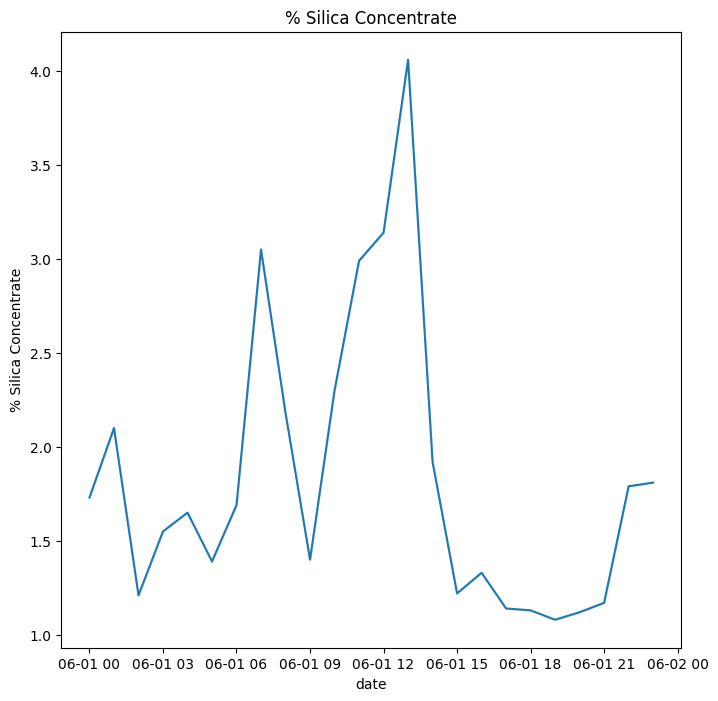

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


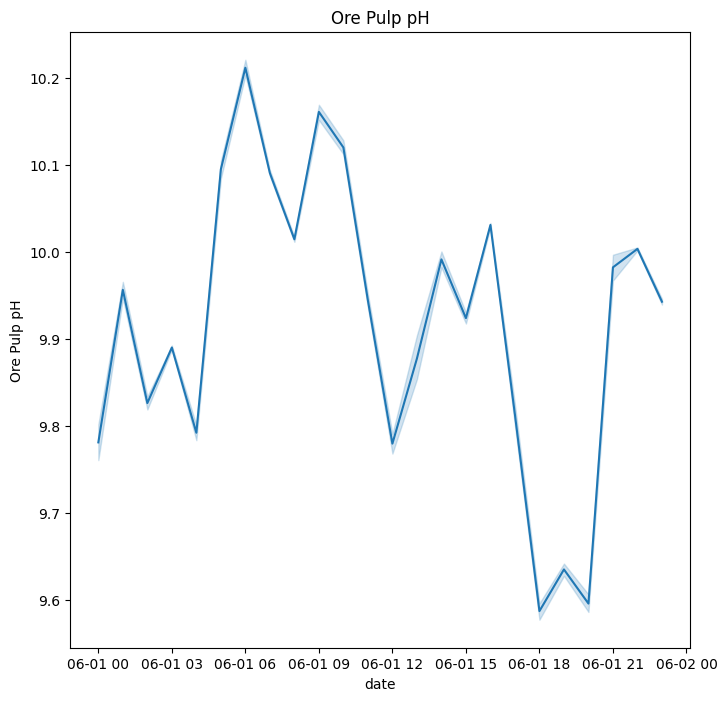

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


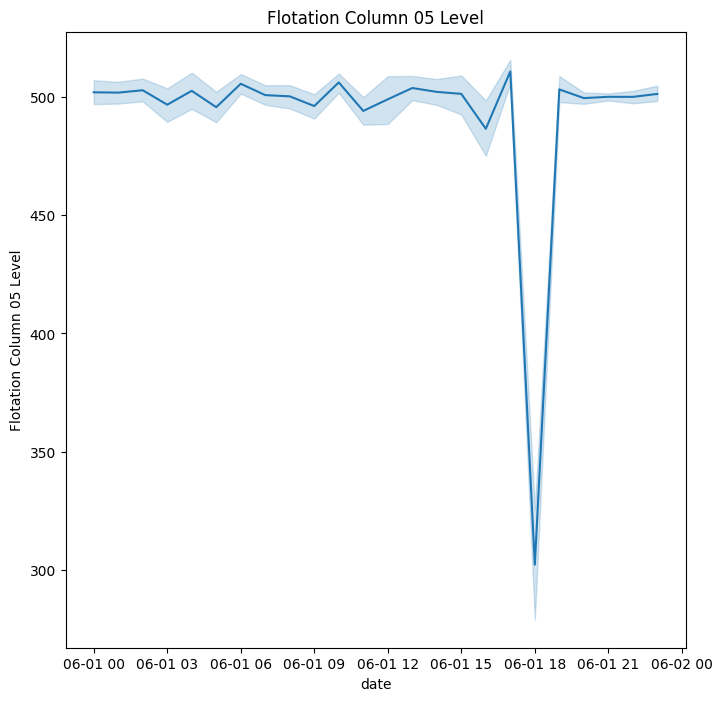

In [24]:
for i in important_cols[1:5]:
    plt.figure(figsize=(8,8))
    sns.lineplot(x="date", y = i, data = june_1_important_df)
    plt.title(i)
    plt.show()

In the line graphs above you can see the Y-axis (an important column) in ralatiohsip to the X-axis (the date June 1st by the hour). 

**Note: The portion of the line that has has the light blue around it indicates multiple readings at the same point** 

## Conclusion

Through the analysis of the Metals R' Us Flotation Plant, one can see that, with the help of the Pair Plot and the correlation matrix, along with the heatmap, there is no correlation between the important columns. Furthermore, the analysis shows that nothing weird happened on June 1, 2017, and this is evidenced by the heatmap, and `.describe()` being nearly identical for the complete dataset (`mining_process_df`), the June dataset (`june_df`), and the June 1st dataset (`june_1_df`).

## Further Research

Further research can be done on this dataset to find other columns that have a higher that **0.7** correlation and to see if any specific day had something weird happen. For this project, I specifically investigated June 1st.